# Homework 4

## FINM 37400 - 2023

In [24]:
import pandas as pd
import numpy as np
import datetime
import warnings

from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

import datetime as dt
pd.set_option('mode.chained_assignment', None)

## 1.1

- The term spread is the difference in yield between two fixed income securities with differing maturities. The case discusses about the predicitve content of the slope of the yield curve, where a steepening curve indicates that the economy is growing and that inflationary pressures are building whilst a flat curve would mean a sluggish growth. 


- The case focuses on the spread between the yield on the 10-year Treasury Bond and the yield on the 3-month Treasury Bill. This spread seems to yield the most rpbust results and essentially displays the difference between long-term interest rates and short-term interest rates. 


- It is stated that the yield curve has had a stellar record for prediciting every US recession since 1950, with the only false signal being the credit crunch and slowdown in production of 1967.


- While case attches importance to all three measures being namely:
    
    -The level of the term spread whiches measures the difference in yields between long and short term rates. A wide term spread indicates an expected growth in the economy while a narrow spread indicates an expected slowdown in the economy and even a potential recession.
    
    -The month-over-month change in the term spread which measures signals in the level of the spread that last for over a month. These are considered robust signals as they last for a significant period of time. Again, a month-over-month change in the term spread indicates the market expectations about the future of the economy. 
    
    -The level of short rates which reflects the current state of monetary policy. Short-term rates are key to control inflation and stabilize the economy. When the fed funds rate is high, it essentially reflects that the central bank is attempting to slow the economy, while low short-term rates indicate a stimulation to the economy, as spending is encourages by making it cheaper to borrow. 
    

It seems like the more important one would be the level of the term spread.

In [25]:
yields = pd.read_excel('yields_2022-11-30.xlsx').set_index('caldt')
yields = yields.drop(yields.columns[[1,2,3,5,6]], axis=1)
yields['Term Spread'] = yields[10] - yields[1]
yields



,1,10,Term Spread
caldt,,,
1961-06-14,2.935907,3.818819,0.882912
1961-06-15,2.932936,3.862987,0.930051
1961-06-16,2.929949,3.863282,0.933333
1961-06-19,2.920884,3.886205,0.965321
1961-06-20,2.952419,3.886506,0.934087
...,...,...,...
2022-11-23,4.666103,3.665568,-1.000535
2022-11-25,4.654875,3.652183,-1.002692
2022-11-28,4.635645,3.650411,-0.985234


Text(0.5, 1.0, 'Term Spread')

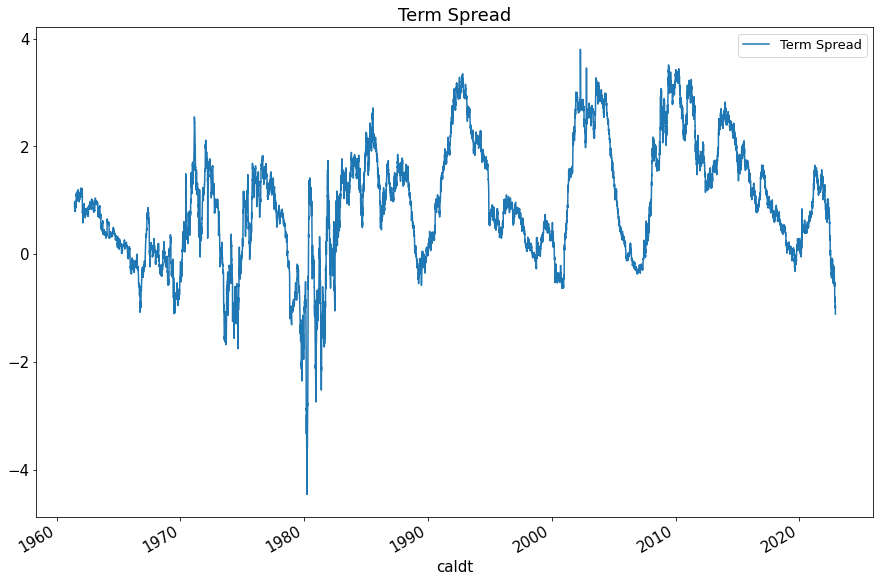

In [26]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 15})
yields.plot(y=["Term Spread"])
plt.title('Term Spread')

Text(0.5, 1.0, 'Term Spread')

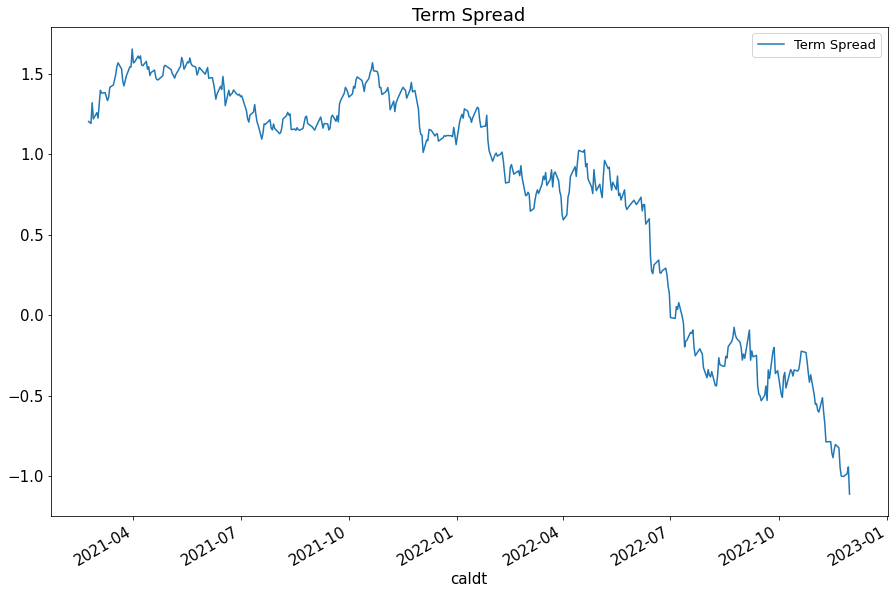

In [27]:
yields2=yields.copy()
yields2.drop(yields2.head(14900).index,
        inplace = True)
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 15})
yields2.plot(y=["Term Spread"])
plt.title('Term Spread')


We see multiple points:
  - First, we see that our curve is very steep from approximately the beggining of 2022 to the end of November 2022. This would essentially mean that the signal is important and should be taken into account. 
  - We see that the yield curve is inverted which would suggest growth to subsequently slowdown. 
  -Lastly, we see an important decrease of about 200 points after a period when the slope was pretty flat (from April 2021 to April 2022) which could suggest a higher probability of recession. 

## 1.2

- By definition, the term premia is the premium that an investor receives for holding a long-term bond relative to a shorter-term bond with the same credit risk. In other words it is the compensation for the longer-term bond's greater exposition to interest rate risk and inflation risk. It is impossible to get a direct measure of it because, in practical, tangible termsn the term premium does not exist, but is an unobservable construct. 



- Equation (1) denotes the 10-year rate at time t. It is basically the mathematical representation of how the yield on a 10-year bond can be determined at time t. It essentially involves the expectation hypothesis, which is that the yield on a long-term bond is equal to the expected average of the future short-term interest rates plus a term premia. For our 10 year rate, this means that it can be written as the average of the next 10 one-year rates plus the term premia that compensates for holding the bond for a longer period. 
- Substracting the first one-year rate from both sides of equation (1) gives equation (2). Basically, equation (2) states that the slope of the yield curve is equal to the difference between the expected average short-term interest rate over the next 10 years and the current short-term interest rate. That is, it is an average of expected changes in the short rate plus a term premia. 
- According to Sacks this complicates the relationship as the evidence supportive of the predicitive role of the slope of the yield curve only focused on the right-hand side of Equation(2) and did not take the term premia into account. However, he provides evidence that the term premium was also important to consider and that only taking the right-hand side of Equation(2) into account was a negligible approach to the problem. 

## 1.3

- An upward sloping yield curve means that long-term rates are higher than short-term rates. From Expectation theory, we know that long-term interest rates should reflect expected future short-term rates. Thus, an upward sloping yield curve would generally predict an increase in the future short-term rates. Moreover, since the term premium is zero then it implies that our long-term rate is only the expected average pf the future short-term interest rates. Since the actual short-terms are lower then it implies future short term interest rates will be higher.  

- In this case, it would be risky to hold long-term bonds as short-term rates will be increasing, thus making our long-term bonds less attractive and the price will decrease. Moreover, we would not be compensated for this risk since the term premium is zero. 

- If the term premium increases to 3 percentage points then it would be less risky since we would be compensated for holding a long-term bond and for our exposition to interest rate risk. 